In [2]:
import sys
 
sys.path.append('C:\\Users\\Nikhil\\Developer\\Data_Science_Projects')
from common_ds_modules import missing_values, data_manipulation, modeling, eda
import os
import pandas as pd
import numpy as np
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)

from sklearn.compose import make_column_selector as selector
from scipy.stats import skew

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.isna().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

May have to drop Cabin as a variable, as there are so many missing values

#### Survival Distribution

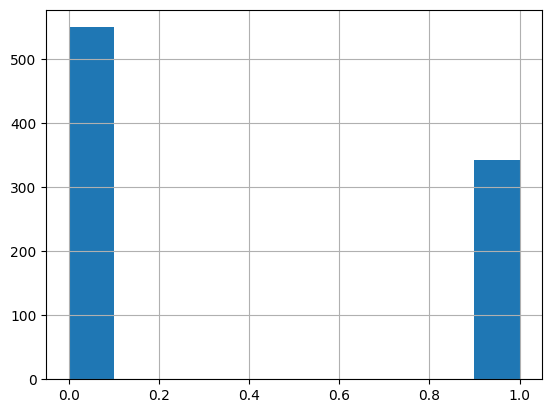

In [5]:
train['Survived'].hist()
plt.show()

In [6]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Slightly over 1/3 survive, would be interesting trying to use SMOTE to balance the population

#### PClass Distribution

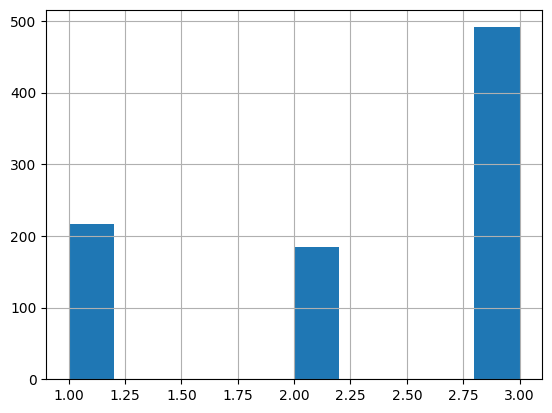

In [7]:
train['Pclass'].hist()
plt.show()

In [8]:
pclass_survivability = pd.crosstab(train['Pclass'], train['Survived'])
pclass_survivability['class_survival_rate'] = pclass_survivability[1]/(pclass_survivability[1] + pclass_survivability[0])
pclass_survivability['class_survival_rate']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: class_survival_rate, dtype: float64

In [9]:
pclass_survivability

Survived,0,1,class_survival_rate
Pclass,,,
1,80,136,0.629630
2,97,87,0.472826
3,372,119,0.242363


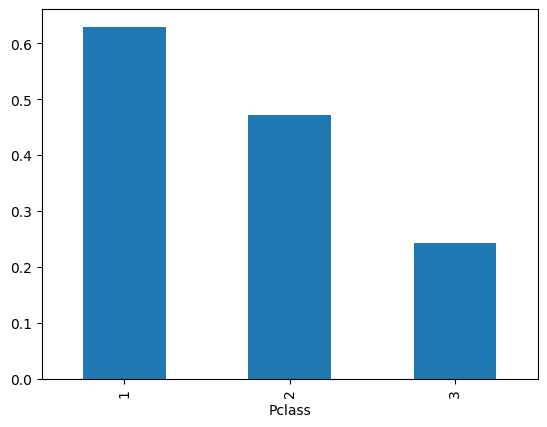

In [10]:
pclass_survivability['class_survival_rate'].plot.bar()
plt.show()

In [11]:
for name, sex in zip(train['Name'].values[:20], train['Sex'].values[:20]):
    print(f'Name: {name}, sex: {sex}')

Name: Braund, Mr. Owen Harris, sex: male
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer), sex: female
Name: Heikkinen, Miss. Laina, sex: female
Name: Futrelle, Mrs. Jacques Heath (Lily May Peel), sex: female
Name: Allen, Mr. William Henry, sex: male
Name: Moran, Mr. James, sex: male
Name: McCarthy, Mr. Timothy J, sex: male
Name: Palsson, Master. Gosta Leonard, sex: male
Name: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg), sex: female
Name: Nasser, Mrs. Nicholas (Adele Achem), sex: female
Name: Sandstrom, Miss. Marguerite Rut, sex: female
Name: Bonnell, Miss. Elizabeth, sex: female
Name: Saundercock, Mr. William Henry, sex: male
Name: Andersson, Mr. Anders Johan, sex: male
Name: Vestrom, Miss. Hulda Amanda Adolfina, sex: female
Name: Hewlett, Mrs. (Mary D Kingcome) , sex: female
Name: Rice, Master. Eugene, sex: male
Name: Williams, Mr. Charles Eugene, sex: male
Name: Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele), sex: female
Name: Masselmani, Mrs. Fatima, sex: fe

In [12]:
for name in zip(train['Name'].values[:20]):
    print(f'Name: {name}')

Name: ('Braund, Mr. Owen Harris',)
Name: ('Cumings, Mrs. John Bradley (Florence Briggs Thayer)',)
Name: ('Heikkinen, Miss. Laina',)
Name: ('Futrelle, Mrs. Jacques Heath (Lily May Peel)',)
Name: ('Allen, Mr. William Henry',)
Name: ('Moran, Mr. James',)
Name: ('McCarthy, Mr. Timothy J',)
Name: ('Palsson, Master. Gosta Leonard',)
Name: ('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',)
Name: ('Nasser, Mrs. Nicholas (Adele Achem)',)
Name: ('Sandstrom, Miss. Marguerite Rut',)
Name: ('Bonnell, Miss. Elizabeth',)
Name: ('Saundercock, Mr. William Henry',)
Name: ('Andersson, Mr. Anders Johan',)
Name: ('Vestrom, Miss. Hulda Amanda Adolfina',)
Name: ('Hewlett, Mrs. (Mary D Kingcome) ',)
Name: ('Rice, Master. Eugene',)
Name: ('Williams, Mr. Charles Eugene',)
Name: ('Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',)
Name: ('Masselmani, Mrs. Fatima',)


In [13]:
def is_married(x):
    return 'mrs.' in x['Name'].lower() and x['Sex'] == 'female'

In [14]:
'(' in train['Name'].values[1].split(', ')[1] and ')' in train['Name'].values[1].split(', ')[1]

True

In [15]:
def get_title(x):
    return x.split(', ')[1].split(' ')[0]

In [16]:
def kept_maiden_name(x):
    return '(' in x['Name'].split(', ')[1] and ')' in x['Name'].split(', ')[1] and x['title'] == 'Mrs.'

In [17]:
train['is_married'] = train.apply(lambda x: is_married(x), axis='columns')

In [18]:
train['title'] = train['Name'].apply(lambda x: get_title(x))

In [19]:
train['kept_maiden_name'] = train.apply(lambda x: kept_maiden_name(x), axis='columns')

In [20]:
train[train['title'] == 'Mrs.']['kept_maiden_name'].value_counts()

kept_maiden_name
True     121
False      4
Name: count, dtype: int64

In [21]:
train['is_married'].value_counts()

is_married
False    766
True     125
Name: count, dtype: int64

In [22]:
train.shape[0] - (517 + 182 + 125 + 40)

27

In [23]:
train['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [24]:
'Lady.' in ['Mr.', 'Miss.']

False

In [25]:
def convert_title(title):
    if title not in ['Mr.', 'Miss.', 'Mrs.', 'Master']:
        return 'other'
    else:
        return title

In [26]:
train['title_converted'] = train['title'].apply(lambda x: convert_title(x) )

In [27]:
train['title_converted'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'other'], dtype=object)

In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted'],
      dtype='object')

In [29]:
train['sex_converted'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

### Survival Rate vs Sex

In [30]:
sex_survivability = pd.crosstab(train['sex_converted'], train['Survived'])
sex_survivability['sex_survival_rate'] = sex_survivability[1]/(sex_survivability[1] + sex_survivability[0])
sex_survivability

Survived,0,1,sex_survival_rate
sex_converted,,,
0,81,233,0.742038
1,468,109,0.188908


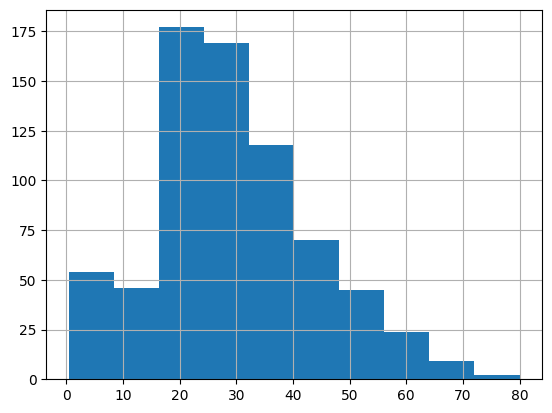

In [31]:
train['Age'].hist()
plt.show()

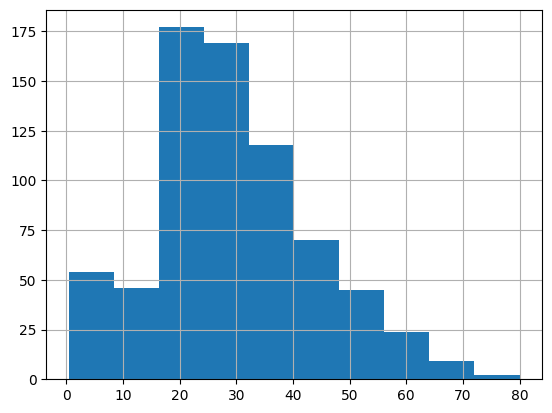

In [32]:
train['Age'].hist()
plt.show()

In [33]:
train['age_group'] = pd.cut(train['Age'], [0,18,29,45,60,1000], labels=[0, 1, 2, 3, 4])

In [34]:
age_group_survivability = pd.crosstab(train['age_group'], train['Survived'])
age_group_survivability['age_group_survival_rate'] = age_group_survivability[1]/(age_group_survivability[1] + age_group_survivability[0])
age_group_survivability

Survived,0,1,age_group_survival_rate
age_group,,,
0,69,70,0.503597
1,159,86,0.351020
2,131,96,0.422907
3,48,33,0.407407
4,17,5,0.227273


In [35]:
156/(159 + 69)

0.6842105263157895

In [36]:
(96 + 33 + 5)/(131 + 48 + 17 + 96 + 33 + 5)

0.40606060606060607

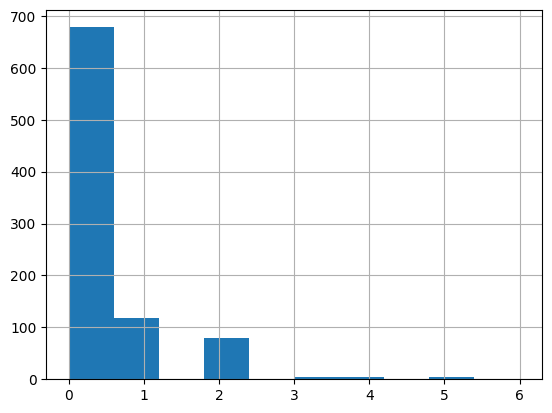

In [37]:
train['Parch'].hist()
plt.show()

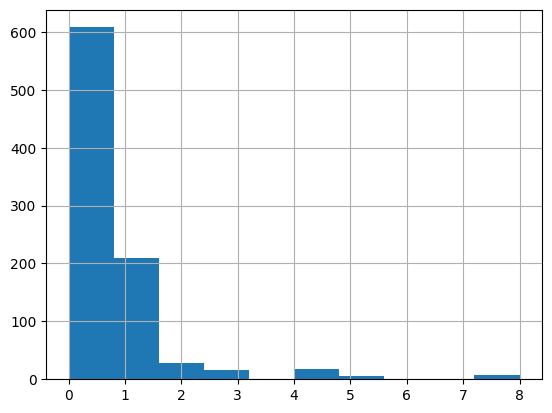

In [38]:
train['SibSp'].hist()
plt.show()

In [39]:
train['family_size'] = train['Parch'] + train['SibSp']

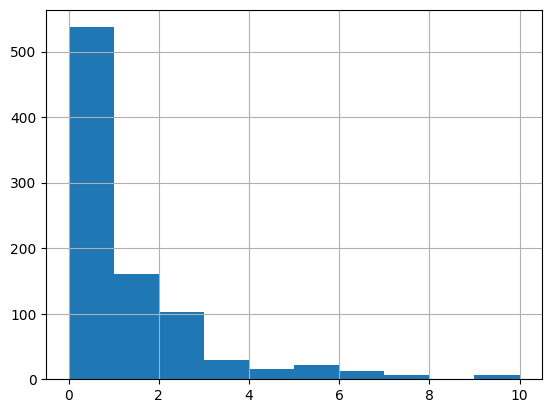

In [40]:
train['family_size'].hist()
plt.show()

In [41]:
train['solo_traveler'] = train['family_size'].apply(lambda x: 1 if x == 0 else 0)
train['solo_traveler'].value_counts()


solo_traveler
1    537
0    354
Name: count, dtype: int64

In [42]:
solo_survivability = pd.crosstab(train['solo_traveler'], train['Survived'])
solo_survivability['solo_survival_rate'] = solo_survivability[1]/(solo_survivability[1] + solo_survivability[0])
solo_survivability

Survived,0,1,solo_survival_rate
solo_traveler,,,
0,175,179,0.505650
1,374,163,0.303538


Traveling solo, drastically increases survival rate, you don't have anyone else to look after

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler'],
      dtype='object')

Assuming ticket prefixes don't matter

In [44]:
train['ticket_prefix'] = train['Ticket'].apply(lambda x: x.split(' ')[0])

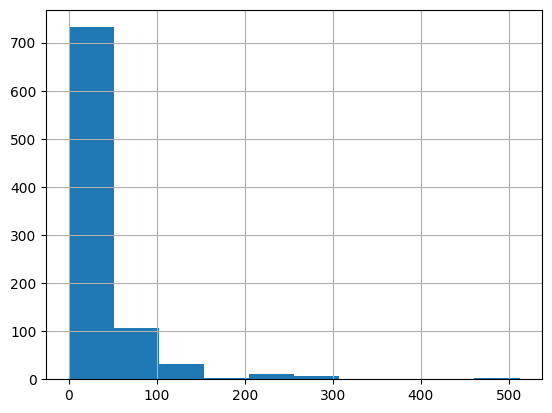

In [45]:
train['Fare'].hist()
plt.show()

In [46]:
train[train['Fare'] == 0].shape

(15, 21)

In [47]:
train[train['Fare'] == 0]['Age']

179    36.0
263    40.0
271    25.0
277     NaN
302    19.0
413     NaN
466     NaN
481     NaN
597    49.0
633     NaN
674     NaN
732     NaN
806    39.0
815     NaN
822    38.0
Name: Age, dtype: float64

In [48]:
train['fare_group'] = pd.cut(train['Fare'], 5, labels=[0, 1, 2, 3, 4])

In [49]:
fare_group_survivability = pd.crosstab(train['fare_group'], train['Survived'])
fare_group_survivability['fare_group_survival_rate'] = fare_group_survivability[1]/(fare_group_survivability[1] + fare_group_survivability[0])
fare_group_survivability

Survived,0,1,fare_group_survival_rate
fare_group,,,
0,535,303,0.361575
1,8,25,0.757576
2,6,11,0.647059
4,0,3,1.000000


In [50]:
train['fare_group'].value_counts()

fare_group
0    838
1     33
2     17
4      3
3      0
Name: count, dtype: int64

In [51]:
train[train['fare_group'] == 0]['Fare'].describe()

count    838.000000
mean      22.411942
std       20.827218
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64

<Axes: >

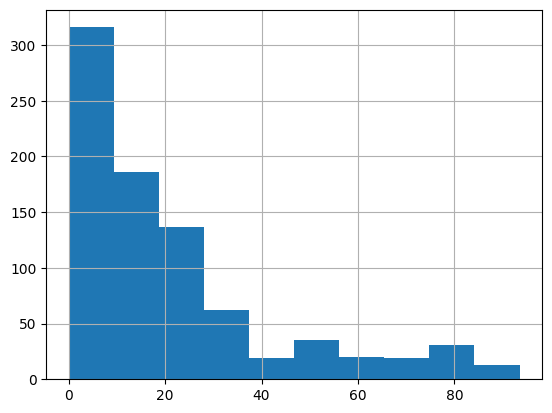

In [52]:
train[train['fare_group'] == 0]['Fare'].hist()

In [53]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
embarked_survivability = pd.crosstab(train['Embarked'], train['Survived'])
embarked_survivability['embarked_survival_rate'] = embarked_survivability[1]/(embarked_survivability[1] + embarked_survivability[0])
embarked_survivability

Survived,0,1,embarked_survival_rate
Embarked,,,
C,75,93,0.553571
Q,47,30,0.389610
S,427,217,0.336957


In [59]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group'],
      dtype='object')

In [62]:
train['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [64]:
train['Cabin'].isna().sum()

687

In [67]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [70]:
def get_cabin(row):
    if pd.isnull(row):
        return None
    else:
        return row[0]

Not enough information to do anything with this

In [72]:
train['cabin_prefix'] = train['Cabin'].apply(lambda x: get_cabin(x))
train['cabin_prefix'].value_counts()

cabin_prefix
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [78]:
train.groupby('cabin_prefix')['Fare'].mean().sort_values()

cabin_prefix
G     13.581250
F     18.696792
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [66]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [65]:
train.shape

(891, 22)

In [ ]:
train['ticket_length'] = train['ticket_prefix']

In [79]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [80]:
def get_ticket_info(row):
    has_code = False
    for i in row:
        if i.isalpha():
            has_code = True
    return has_code
        

In [81]:
train['ticket_code'] = train['Ticket'].apply(lambda row: get_ticket_info(row))

In [82]:
train['ticket_code'].value_counts()

ticket_code
False    661
True     230
Name: count, dtype: int64

In [83]:
train[train['ticket_code'] == True]['ticket_prefix'].unique()

array(['A/5', 'PC', 'STON/O2.', 'PP', 'A/5.', 'C.A.', 'A./5.', 'SC/Paris',
       'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [88]:
train[train['ticket_code'] == False]['Ticket'].value_counts()

Ticket
1601       7
347082     7
3101295    6
347088     6
382652     5
          ..
3101267    1
11765      1
14313      1
2626       1
370376     1
Name: count, Length: 514, dtype: int64

In [87]:
ticket_code_present = train[train['ticket_code'] == True]
ticket_code_present.groupby('ticket_prefix')['Fare'].mean().sort_values()

ticket_prefix
LINE            0.000000
SOTON/O.Q.      7.300000
Fa              7.312500
SOTON/O2        7.525000
A/5             7.650000
A/4.            7.700000
STON/O          7.725000
SOTON/OQ        7.792857
S.C./A.4.       8.050000
A./5.           8.050000
A.5.            8.050000
A4.             8.050000
A/S             8.050000
S.P.            8.158300
S.O./P.P.       9.516667
C              10.123340
SO/C           10.500000
S.W./PP        10.500000
W/C            10.500000
C.A./SOTON     10.500000
SW/PP          10.500000
STON/O2.       10.566667
SC             12.000000
A/5.           12.147614
SCO/W          12.275000
S.O.P.         12.525000
PP             14.250000
SC/PARIS       17.107480
C.A.           18.327778
A/4            18.783333
SC/AH          21.930567
F.C.C.         22.050000
W./C.          23.661111
P/PP           24.000000
SC/Paris       34.403150
S.C./PARIS     37.004200
CA             46.900000
F.C.           52.000000
W.E.P.         61.175000
CA.        

In [90]:
ticket_code_present['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [92]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'PC']['Fare'].describe()

count     60.000000
mean     122.080483
std      114.189525
min       25.925000
25%       49.504200
50%       79.200000
75%      148.256225
max      512.329200
Name: Fare, dtype: float64

In [96]:
ticket_code_present['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
10             PP 9549
12           A/5. 2151
30            PC 17601
31            PC 17569
33          C.A. 24579
34            PC 17604
37          A./5. 2152
43       SC/Paris 2123
45     S.C./A.4. 23567
51          A/4. 39886
52            PC 17572
56          C.A. 31026
58          C.A. 34651
59             CA 2144
64            PC 17605
66          C.A. 29395
67           S.P. 3464
Name: Ticket, dtype: object

In [100]:
x = 'A/5 21171'
x.split()[1][0:2]

'21'

In [103]:
def get_ticket_sub_prefix(ticket):
    if ' ' in ticket:
        return ticket.split(' ')[1][0:2]
    else:
        return ticket


In [104]:
ticket_code_present['ticket_sub_prefix'] = ticket_code_present['Ticket'].apply(lambda x: get_ticket_sub_prefix(x))

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_12336\326430396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticket_code_present['ticket_sub_prefix'] = ticket_code_present['Ticket'].apply(lambda x: get_ticket_sub_prefix(x))


In [105]:
ticket_code_present['ticket_sub_prefix'].value_counts()

ticket_sub_prefix
17      63
21      21
31      20
2.      12
23      11
14       9
39       9
33       9
34       7
66       7
13       6
29       4
LINE     4
57       3
24       3
20       3
26       3
35       3
75       3
70       3
3        2
48       2
28       2
18       2
37       2
95       2
11       2
10       1
15       1
30       1
43       1
Ba       1
45       1
62       1
40       1
85       1
32       1
12       1
54       1
55       1
Name: count, dtype: int64

In [95]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'PC']['Ticket'].head(50)

1      PC 17599
30     PC 17601
31     PC 17569
34     PC 17604
52     PC 17572
64     PC 17605
96     PC 17754
97     PC 17759
118    PC 17558
139    PC 17593
155    PC 17597
168    PC 17318
177    PC 17595
194    PC 17610
195    PC 17569
256    PC 17585
258    PC 17755
268    PC 17582
269    PC 17760
273    PC 17596
295    PC 17612
299    PC 17558
307    PC 17758
309    PC 17485
311    PC 17608
325    PC 17760
332    PC 17582
334    PC 17611
369    PC 17477
373    PC 17760
375    PC 17604
380    PC 17757
493    PC 17609
505    PC 17758
512    PC 17473
513    PC 17603
527    PC 17483
537    PC 17761
544    PC 17761
557    PC 17757
572    PC 17474
599    PC 17485
609    PC 17582
641    PC 17477
645    PC 17572
660    PC 17611
679    PC 17755
681    PC 17572
700    PC 17757
701    PC 17475
Name: Ticket, dtype: object

In [108]:
ticket_code_present.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_code', 'ticket_sub_prefix'],
      dtype='object')

In [111]:
ticket_code_present['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [112]:
for pre in ticket_code_present['ticket_prefix'].unique():
    if len(ticket_code_present[ticket_code_present['ticket_prefix'] == pre]['ticket_sub_prefix'].unique()) > 1:
        print(f'{pre} has more than 1')
    

A/5 has more than 1
PP has more than 1
A/5. has more than 1
C.A. has more than 1
A./5. has more than 1
A/4. has more than 1
W./C. has more than 1
SOTON/OQ has more than 1
C has more than 1
SOTON/O.Q. has more than 1
A.5. has more than 1
SC/AH has more than 1
A/4 has more than 1
S.O./P.P. has more than 1


In [113]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'A/5']['ticket_sub_prefix'].unique()

array(['21', '35', '24', '28', '39'], dtype=object)

In [114]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'A/5.']['ticket_sub_prefix'].unique()

array(['21', '33', '85', '10', '13'], dtype=object)

In [94]:
ticket_code_present[ticket_code_present['ticket_prefix'] == 'C.A.']['Ticket'].head(10)

33     C.A. 24579
56     C.A. 31026
58     C.A. 34651
66     C.A. 29395
70     C.A. 33111
93      C.A. 2315
134    C.A. 29178
145    C.A. 33112
161    C.A. 33595
234    C.A. 29566
Name: Ticket, dtype: object

In [136]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_code'],
      dtype='object')

In [138]:
#train['ticket_code'].unique()
train[train['ticket_code'] == True]['ticket_prefix'].unique()

array(['A/5', 'PC', 'STON/O2.', 'PP', 'A/5.', 'C.A.', 'A./5.', 'SC/Paris',
       'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

replace . and / with nothing

In [144]:
train[train['ticket_code'] == True]['ticket_prefix'].value_counts()

ticket_prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [143]:
ticket_prefixes = train[train['ticket_code'] == True]['ticket_prefix_cleaned'].value_counts().reset_index()
ticket_prefixes

,ticket_prefix_cleaned,count
0,PC,60
1,CA,41
2,A5,21
3,SOTONOQ,15
4,STONO,12
5,WC,10
6,A4,7
7,SCPARIS,7
8,STONO2,6
9,SOC,6


In [146]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [ ]:
train['ticket_numeric'] = train

In [145]:
train[train['ticket_code'] == True]['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
10              PP 9549
12            A/5. 2151
             ...       
867            PC 17590
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 230, dtype: object

In [139]:
train['ticket_prefix_cleaned'] = train.apply(lambda row: row['ticket_prefix']\
                                      .replace('.', '').replace('/', '') if row['ticket_code'] else row['ticket_prefix'], axis='columns')

In [121]:
train[train['Ticket'] == 'LINE'][['PassengerId', 'Pclass', 'Name', 'Age', 'family_size', 'Fare', 'Embarked']]

,PassengerId,Pclass,Name,Age,family_size,Fare,Embarked
179,180,3,"Leonard, Mr. Lionel",36.0,0,0.0,S
271,272,3,"Tornquist, Mr. William Henry",25.0,0,0.0,S
302,303,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0.0,S
597,598,3,"Johnson, Mr. Alfred",49.0,0,0.0,S


In [123]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [122]:
train[train['Fare'] == 0][['PassengerId', 'Pclass', 'Name', 'Age', 'family_size', 'Fare', 'Embarked']]

,PassengerId,Pclass,Name,Age,family_size,Fare,Embarked
179,180,3,"Leonard, Mr. Lionel",36.0,0,0.0,S
263,264,1,"Harrison, Mr. William",40.0,0,0.0,S
271,272,3,"Tornquist, Mr. William Henry",25.0,0,0.0,S
277,278,2,"Parkes, Mr. Francis ""Frank""",NaN,0,0.0,S
302,303,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0.0,S
413,414,2,"Cunningham, Mr. Alfred Fleming",NaN,0,0.0,S
466,467,2,"Campbell, Mr. William",NaN,0,0.0,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",NaN,0,0.0,S
597,598,3,"Johnson, Mr. Alfred",49.0,0,0.0,S
633,634,1,"Parr, Mr. William Henry Marsh",NaN,0,0.0,S


<Axes: >

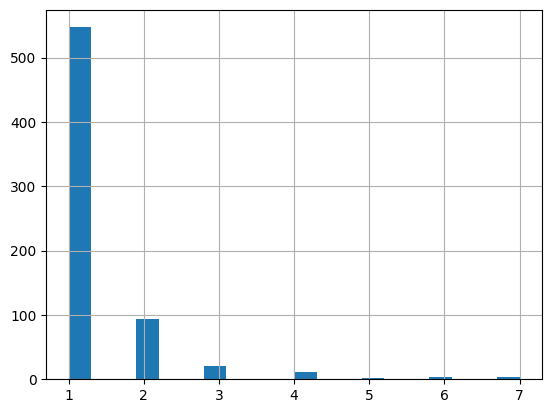

In [134]:
ticket_counts = train['Ticket'].value_counts().reset_index()
ticket_counts['count'].hist(bins=20)

,Ticket,count
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


In [131]:
train.groupby('Ticket')['Ticket'].size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Ticket, Length: 681, dtype: int64

In [124]:
train.groupby('Ticket').size()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [155]:
train['Ticket'] = train['Ticket'].replace({'LINE': 'LINE 000'})

In [148]:
train[train['Ticket'] == 'LINE 0'].shape[0]

4

In [150]:
train['ticket_numeric'] = train['Ticket'].apply(lambda x: x.split()[1] if ' ' in x else x)

In [151]:
train['ticket_numeric']

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: ticket_numeric, Length: 891, dtype: object

In [153]:
train['ticket_numeric_length'] = train['ticket_numeric'].apply(lambda x: len(x))
train['ticket_numeric_length'].value_counts()

ticket_numeric_length
6    423
5    247
4    165
7     32
2     12
3      6
1      6
Name: count, dtype: int64

In [154]:
train['Ticket'].isna().sum()

0

In [161]:
train['ticket_numeric_prefix_2'] = train['ticket_numeric'].apply(lambda x: x[:2])
train['ticket_numeric_prefix']

0      211
1      175
2      310
3      113
4      373
      ... 
886    211
887    112
888    660
889    111
890    370
Name: ticket_numeric_prefix, Length: 891, dtype: object

In [163]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix_2'].unique()

array(['17'], dtype=object)

In [166]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_length'].unique()

array([5], dtype=int64)

In [164]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_married', 'title',
       'kept_maiden_name', 'title_converted', 'sex_converted', 'age_group',
       'family_size', 'solo_traveler', 'ticket_prefix', 'fare_group',
       'cabin_prefix', 'ticket_code', 'ticket_prefix_cleaned',
       'ticket_numeric', 'ticket_numeric_length', 'ticket_numeric_prefix',
       'ticket_numeric_prefix_4', 'ticket_numeric_prefix_2'],
      dtype='object')

In [165]:
train[train['ticket_prefix_cleaned'] == 'CA']['ticket_numeric_prefix_2'].unique()

array(['24', '31', '34', '21', '29', '33', '23', '17', '26', '37', '18',
       '62', '55'], dtype=object)

In [167]:
train[train['ticket_prefix_cleaned'] == 'CA']['ticket_numeric_length'].unique()

array([5, 4], dtype=int64)

In [158]:
train[train['ticket_prefix'] == 'PC']['ticket_numeric_prefix'].unique()

array(['175', '176', '177', '173', '174'], dtype=object)

In [169]:
train[train['ticket_prefix_cleaned'] == 'A5']['ticket_numeric_prefix_2'].unique()

array(['21', '33', '11', '85', '35', '10', '24', '13', '28', '18', '32',
       '39'], dtype=object)

In [170]:
train[train['ticket_prefix_cleaned'] == 'A5']['ticket_numeric_length'].unique()

array([5, 4, 3], dtype=int64)

In [172]:
train[train['ticket_prefix_cleaned'] == 'PC']['Ticket']

1      PC 17599
30     PC 17601
31     PC 17569
34     PC 17604
52     PC 17572
64     PC 17605
96     PC 17754
97     PC 17759
118    PC 17558
139    PC 17593
155    PC 17597
168    PC 17318
177    PC 17595
194    PC 17610
195    PC 17569
256    PC 17585
258    PC 17755
268    PC 17582
269    PC 17760
273    PC 17596
295    PC 17612
299    PC 17558
307    PC 17758
309    PC 17485
311    PC 17608
325    PC 17760
332    PC 17582
334    PC 17611
369    PC 17477
373    PC 17760
375    PC 17604
380    PC 17757
493    PC 17609
505    PC 17758
512    PC 17473
513    PC 17603
527    PC 17483
537    PC 17761
544    PC 17761
557    PC 17757
572    PC 17474
599    PC 17485
609    PC 17582
641    PC 17477
645    PC 17572
660    PC 17611
679    PC 17755
681    PC 17572
700    PC 17757
701    PC 17475
707    PC 17476
710    PC 17482
716    PC 17757
737    PC 17755
742    PC 17608
789    PC 17593
793    PC 17600
835    PC 17756
853    PC 17592
867    PC 17590
Name: Ticket, dtype: object

In [173]:
train[train['ticket_prefix_cleaned'] == 'CA']['Ticket']

33     C.A. 24579
56     C.A. 31026
58     C.A. 34651
59        CA 2144
66     C.A. 29395
70     C.A. 33111
71        CA 2144
93      C.A. 2315
134    C.A. 29178
145    C.A. 33112
159      CA. 2343
161    C.A. 33595
180      CA. 2343
201      CA. 2343
234    C.A. 29566
237    C.A. 31921
265    C.A. 17248
279     C.A. 2673
324      CA. 2343
348    C.A. 37671
386       CA 2144
439    C.A. 18723
450    C.A. 34651
472    C.A. 34651
480       CA 2144
489    C.A. 37671
497     C.A. 6212
516    C.A. 34260
549    C.A. 33112
637    C.A. 31921
649      CA. 2314
672    C.A. 24580
678       CA 2144
683       CA 2144
746     C.A. 2673
788     C.A. 2315
792      CA. 2343
801    C.A. 31921
845     C.A. 5547
846      CA. 2343
863      CA. 2343
Name: Ticket, dtype: object

In [174]:
train[train['ticket_prefix_cleaned'] == 'A5']['Ticket']

0       A/5 21171
12      A/5. 2151
37     A./5. 2152
132     A/5. 3337
152    A.5. 11206
153      A/5. 851
204      A/5 3540
212     A/5 21174
227     A/5 21173
253     A/5. 3336
283    A/5. 10482
304      A/5 2466
320     A/5 21172
421    A/5. 13032
454      A/5 2817
482      A/5 3594
488    A.5. 18509
589    A./5. 3235
592      A/5 3902
617     A/5. 3336
668      A/5 3536
Name: Ticket, dtype: object

In [168]:
train['ticket_prefix_cleaned'].value_counts()

ticket_prefix_cleaned
PC         60
CA         41
A5         21
SOTONOQ    15
STONO      12
           ..
113784      1
7598        1
349225      1
113043      1
370376      1
Name: count, Length: 544, dtype: int64